In [1]:
"""Temporary fix for importing modules from parent directory"""
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from varitop.integrator import DelIntegrator as DI

In [3]:
from darli.model import Functional
from darli.backend import CasadiBackend

In [4]:
from matplotlib import pyplot as plt
from tqdm import tqdm
import casadi as cs
import numpy as np

In [5]:
urdf_path = '../assets/urdf/2link_robot.urdf'
darli_model = Functional(CasadiBackend(urdf_path=urdf_path))
t0, tf, steps = 0.0, 3.0, 1000
dt = (tf - t0) / steps

In [6]:
di = DI(
    nq=darli_model.nq,
    nu=darli_model.nu,
    lagrangian=darli_model.lagrangian,
)

In [7]:
q_0 = np.array([np.pi / 6, np.pi / 2])

In [8]:
qs_sol = np.zeros((steps, 2))
qs_sol[0] = q_0
qs_sol[1] = q_0

for i in tqdm(range(2, steps)):
    q0 = qs_sol[i - 2]
    q1 = qs_sol[i - 1]

    qs_sol[i] = di.step(q0, q1, dt)

  0%|          | 0/998 [00:00<?, ?it/s]

100%|██████████| 998/998 [00:00<00:00, 1464.42it/s]


In [9]:
Kes = np.zeros(steps)
Pes = np.zeros(steps)

for i in range(1, steps):
    Kes[i] = darli_model.energy.kinetic(qs_sol[i], (qs_sol[i] - qs_sol[i - 1]) / dt)
    Pes[i] = darli_model.energy.potential(qs_sol[i])

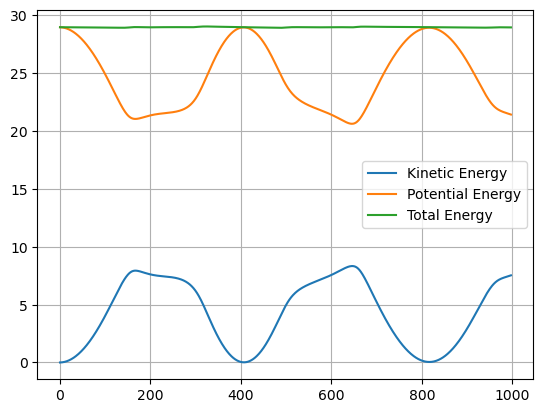

In [11]:
plt.plot(Kes[2:], label='Kinetic Energy')
plt.plot(Pes[2:], label='Potential Energy')
plt.plot(Kes[2:] + Pes[2:], label='Total Energy')
plt.grid()
plt.legend()
plt.show()